# Men's World Record Mile Times

![a runner](https://www.nnrunningteam.com/files/images/485-458-1083-slide.jpg?1570881944)

## Goals for this example project:

1. Use documentation for some small challenges.

2. Practice data cleaning.

3. Practice aggregation. 

4. Practice simple visualization.

[source - wikipedia](https://en.wikipedia.org/wiki/Mile_run_world_record_progression#:~:text=World%20Athletics%20is%20the%20official,the%20IAAF%20for%20record%20purposes)

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import StringIO

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/josephplpriest/mens_WR_mile_run/master/mens_WR_mile_times.csv")

data.head()

,Time,Auto,Athlete,Nationality,Date,Venue
0,*4:14.4*,NaN,John Paul Jones,United States,31 May 1913[5],"Allston, Mass."
1,*4:12.6*,NaN,Norman Taber,United States,16 July 1915[5],"Allston, Mass."
2,*4:10.4*,NaN,Paavo Nurmi,Finland,23 August 1923[5],Stockholm
3,*4:09.2*,NaN,Jules Ladoumègue,France,4 October 1931[5],Paris
4,*4:07.6*,NaN,Jack Lovelock,New Zealand,15 July 1933[5],"Princeton, N.J."


# Easy:

In [5]:
data['Time'] = data['Time'].str.replace("*", "", regex=False) # Clean the asterisks from the time column
data.head()

,Time,Auto,Athlete,Nationality,Date,Venue
0,4:14.4,NaN,John Paul Jones,United States,31 May 1913[5],"Allston, Mass."
1,4:12.6,NaN,Norman Taber,United States,16 July 1915[5],"Allston, Mass."
2,4:10.4,NaN,Paavo Nurmi,Finland,23 August 1923[5],Stockholm
3,4:09.2,NaN,Jules Ladoumègue,France,4 October 1931[5],Paris
4,4:07.6,NaN,Jack Lovelock,New Zealand,15 July 1933[5],"Princeton, N.J."


In [6]:
data = data.drop('Auto', axis=1,) # Remove meaningless columns
data.head()

,Time,Athlete,Nationality,Date,Venue
0,4:14.4,John Paul Jones,United States,31 May 1913[5],"Allston, Mass."
1,4:12.6,Norman Taber,United States,16 July 1915[5],"Allston, Mass."
2,4:10.4,Paavo Nurmi,Finland,23 August 1923[5],Stockholm
3,4:09.2,Jules Ladoumègue,France,4 October 1931[5],Paris
4,4:07.6,Jack Lovelock,New Zealand,15 July 1933[5],"Princeton, N.J."


In [7]:
data['Date'] = data['Date'].str.replace("\[5\]", "", regex=False) # Clean the date column of "[5]"
data.head()

,Time,Athlete,Nationality,Date,Venue
0,4:14.4,John Paul Jones,United States,31 May 1913[5],"Allston, Mass."
1,4:12.6,Norman Taber,United States,16 July 1915[5],"Allston, Mass."
2,4:10.4,Paavo Nurmi,Finland,23 August 1923[5],Stockholm
3,4:09.2,Jules Ladoumègue,France,4 October 1931[5],Paris
4,4:07.6,Jack Lovelock,New Zealand,15 July 1933[5],"Princeton, N.J."


# Medium:

In [10]:
unique_athletes = data['Athlete'].unique() # How many *unique* WR holders have there been?
unique_athletes.size

23

In [11]:
most_wins = data['Athlete'].value_counts().sort_values(ascending=False).head(4) # Who holds the most records?
most_wins

Sebastian Coe     3
Arne Andersson    3
Gunder Hägg       3
Peter Snell       2
Name: Athlete, dtype: int64

In [12]:
data['TIme_seconds'] = data['Time'].apply(lambda x: float(x.split(':')[0])*60+float(x.split(':')[1])) # Convert the time column into total seconds
data.head()

,Time,Athlete,Nationality,Date,Venue,TIme_seconds
0,4:14.4,John Paul Jones,United States,31 May 1913,"Allston, Mass.",254.4
1,4:12.6,Norman Taber,United States,16 July 1915,"Allston, Mass.",252.6
2,4:10.4,Paavo Nurmi,Finland,23 August 1923,Stockholm,250.4
3,4:09.2,Jules Ladoumègue,France,4 October 1931,Paris,249.2
4,4:07.6,Jack Lovelock,New Zealand,15 July 1933,"Princeton, N.J.",247.6


# Hard:

In [13]:
data['Date'] = pd.to_datetime(data['Date']) # Convert the date column to the datetime type
data.head()

,Time,Athlete,Nationality,Date,Venue,TIme_seconds
0,4:14.4,John Paul Jones,United States,1913-05-31,"Allston, Mass.",254.4
1,4:12.6,Norman Taber,United States,1915-07-16,"Allston, Mass.",252.6
2,4:10.4,Paavo Nurmi,Finland,1923-08-23,Stockholm,250.4
3,4:09.2,Jules Ladoumègue,France,1931-10-04,Paris,249.2
4,4:07.6,Jack Lovelock,New Zealand,1933-07-15,"Princeton, N.J.",247.6


In [14]:
diff_record_holders = data.drop_duplicates(subset=['Athlete'])
diff_record_holders['Nationality'].value_counts().sort_values(ascending=False) # What country has the most DIFFERENT record holders?


United Kingdom    6
United States     4
New Zealand       3
France            2
Sweden            2
Australia         2
Finland           1
Tanzania          1
Algeria           1
Morocco           1
Name: Nationality, dtype: int64

# Extra credit:

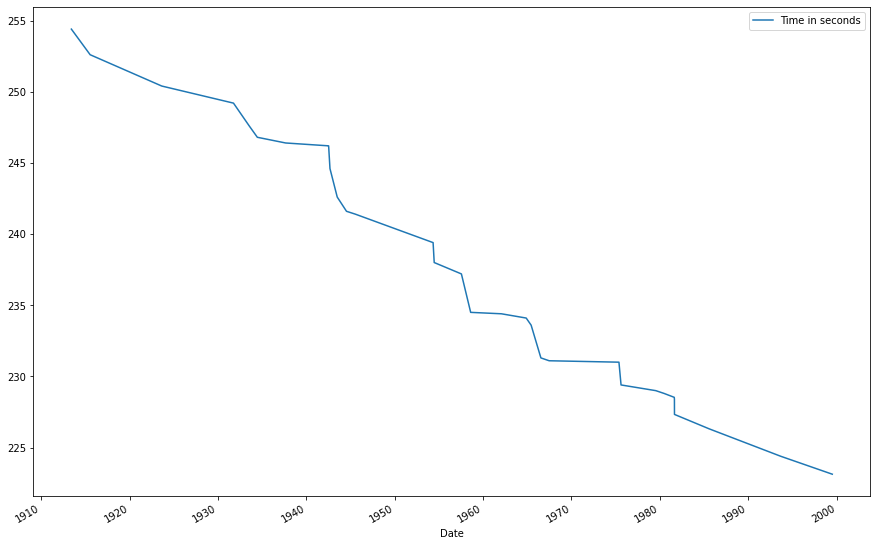

In [68]:
fig, ax = plt.subplots()
data.plot.line(3,5, ax=ax, figsize=(15, 10))
ax.legend(['Time in seconds'])

## Tasks:

### [Easy: Data Cleaning](#easy)

[1.1](#1.1)
* Clean the asterisks from the time column?

*hint - look for pandas string methods to replace a character or characters*

[1.2](#1.2)
* Remove meaningless columns? 

*hint - do we have a column with lots of missing values, how to drop a column in pandas*

[1.3](#1.3)
* Clean the date column of "[5]"

*pandas string methods to replace characters*




### [Medium: Calculation and Aggregation](#medium)

[2.1](#2.1) 
* How many *unique* WR holders have there been? Who holds the most records?

*hint - pandas unique items in a column, value counts*


[2.2](#2.2) 
* Convert the time column into total seconds.

*hint - split a string, how to convert minutes to seconds and add*




### [Hard:](#hard)

[3.1](#3.1) 
* Convert the date column to the datetime type.

*hint - pandas datetime method*


[3.2](#3.2) 
* What country has the most DIFFERENT record holders?

*hint - pandas group by, unique*



## [Extra credit:](#ec)

[4.1](#4.1)
* Visualize a line plot of Date (on the x axis) and Time (on the y axis) to show the historical change in WR times.

*hint - pandas line plot*